<a href="https://colab.research.google.com/github/idjoopal/DL_tensorflow2.0/blob/main/%EC%8B%A4%EC%8A%B5_3_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

In [1]:
import tensorflow as tf 

from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential

아래 코드는 Learning curve를 그리는 기능을 수행합니다

In [2]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(9,6))

  for history in histories:
    plt.plot(history.epoch, history.history['accuracy'], label='training')
    plt.plot(history.epoch, history.history['val_accuracy'], label='validation')

  plt.xlabel('Epochs')
  plt.ylabel('ACC')
  plt.legend()

  plt.xlim([0,max(history.epoch)])

MNIST 데이터 로드


In [3]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 0~255의 픽셀 값을 0~1로 조정
x_train, x_test = x_train / 255.0, x_test / 255.0

# shape 조정
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정답 label을 길이10 벡터화
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

11493376/11490434 [==============================] - 0s 0us/step


# 실습 MISSION
### 기준모델을 만들어 다양한 regularization 적용하기

* hidden size 1024짜리 Dense레이어 5층 쌓기
* Activation으로 ReLU 이용
* 출력 Dense레이어에서 softmax 활용하여 10개 숫자 분류


Epoch 1/25
196/196 [==============================] - 1s 7ms/step - loss: 0.2988 - accuracy: 0.9076 - val_loss: 0.1356 - val_accuracy: 0.9615
Epoch 2/25
196/196 [==============================] - 1s 6ms/step - loss: 0.1028 - accuracy: 0.9700 - val_loss: 0.1225 - val_accuracy: 0.9646
Epoch 3/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0688 - accuracy: 0.9796 - val_loss: 0.1048 - val_accuracy: 0.9708
Epoch 4/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0573 - accuracy: 0.9837 - val_loss: 0.1000 - val_accuracy: 0.9751
Epoch 5/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0467 - accuracy: 0.9865 - val_loss: 0.1001 - val_accuracy: 0.9744
Epoch 6/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.0969 - val_accuracy: 0.9755
Epoch 7/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.1169 - val_accuracy: 0.9780
Epoch 

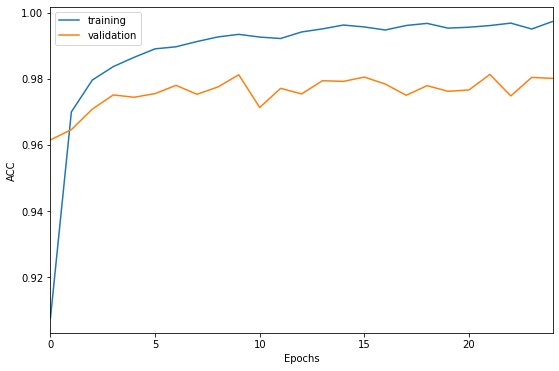

In [4]:
model = tf.keras.models.Sequential([ 

# 미션을 작성하세요!  
Flatten(),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=256, epochs=25, validation_data=(x_val, y_val), verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)

plot_history([history])

### Early stopping 구현하기

위 작성한 모델을 복사해오기, 50 epoch동안 학습하도록 수정

매 epoch마다 validation accuracy의 개선이 없으면 학습을 거기서 중단하도록 하자!

몇 번 봐줄까? --> patience 옵션을 통해 조절

* 한번이라도 정확도가 감소하면 바로 stop!
* 두번은 봐주자! 연속 두번 감소하면 그때 stop!
* ...

tf.keras.callbacks.EarlyStopping 기능 활용,
매 epoch마다 지정한 metric을 기준으로 early stopping을 선정 가능

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 0.2732 - accuracy: 0.9150 - val_loss: 0.1113 - val_accuracy: 0.9675
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.1006 - val_accuracy: 0.9705
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.1063 - val_accuracy: 0.9697
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0506 - accuracy: 0.9851 - val_loss: 0.0993 - val_accuracy: 0.9728
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.1014 - val_accuracy: 0.9742
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.0877 - val_accuracy: 0.9759
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0967 - val_accuracy: 0.9770
Epoch 

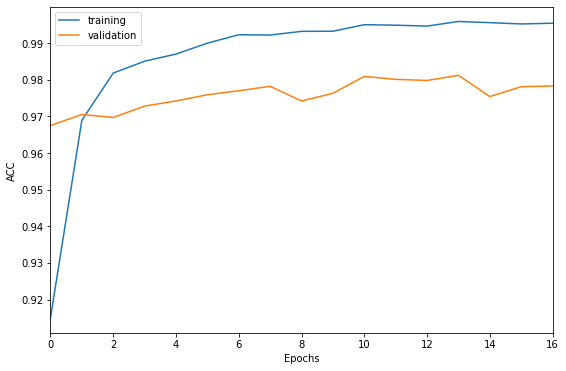

In [6]:
model = tf.keras.models.Sequential([

# 미션을 작성하세요!  
Flatten(),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(10, activation='softmax')

])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)  # 빈칸을 채워봅시다!

history = model.fit(x_train, y_train, batch_size=256, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stop], verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)
plot_history([history])

### Capacity 조정 및 Dropout 구현하기

기준 모델을 복사해오기

hidden 2층과 output layer만 남기기

Dropout layer 활용, 레이어 사이마다 50% dropout 적용하기

Epoch 1/25
196/196 [==============================] - 1s 5ms/step - loss: 0.5814 - accuracy: 0.8130 - val_loss: 0.1700 - val_accuracy: 0.9523
Epoch 2/25
196/196 [==============================] - 1s 4ms/step - loss: 0.3125 - accuracy: 0.9007 - val_loss: 0.1310 - val_accuracy: 0.9622
Epoch 3/25
196/196 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.9211 - val_loss: 0.1051 - val_accuracy: 0.9689
Epoch 4/25
196/196 [==============================] - 1s 4ms/step - loss: 0.2192 - accuracy: 0.9316 - val_loss: 0.0997 - val_accuracy: 0.9706
Epoch 5/25
196/196 [==============================] - 1s 4ms/step - loss: 0.1992 - accuracy: 0.9363 - val_loss: 0.0923 - val_accuracy: 0.9724
Epoch 6/25
196/196 [==============================] - 1s 4ms/step - loss: 0.1886 - accuracy: 0.9399 - val_loss: 0.0818 - val_accuracy: 0.9752
Epoch 7/25
196/196 [==============================] - 1s 4ms/step - loss: 0.1702 - accuracy: 0.9460 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 

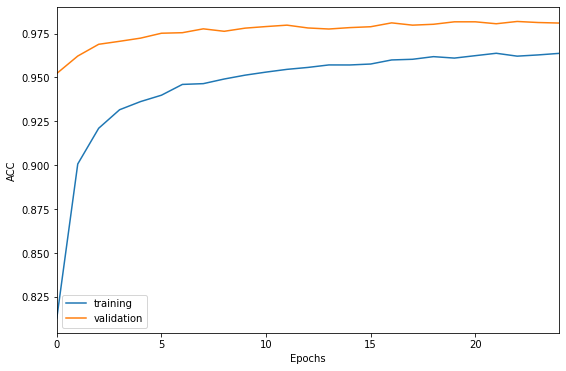

In [7]:
# 필요한 기능을 import합니다
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential([

# 미션을 작성하세요!
Flatten(),
Dropout(rate=0.5),
Dense(1024, activation='relu'),
Dropout(rate=0.5),
Dense(1024, activation='relu'),
Dropout(rate=0.5),
Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

history = model.fit(x_train, y_train, batch_size=256, epochs=25, validation_data=(x_val, y_val), verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)
plot_history([history])